***Multiple Linear Regression Model From Scratch***

Importing the necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Loading the Data Set

In [2]:
df = pd.read_csv("DataSet.csv")

Defining Features and Response
- Separating all the features as x and responses as y.
- So the columns are features(x) and column is responce(y).

In [3]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y = df['Chance of Admit '].values

Feature Scaling
- we perform Feature scaling to ensure that all features have the same scale.
- we scale it down so that the gradient descent converges more quickly towards minima.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

Separting training and testing data
- Separate the dataset into training and testing
- We take out certain proportion of data for testing purpose so that we calculate the models accuracy later.
- Over here we take out 35% of data for testing purpose.

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.35,random_state=42)

Creating the Cost function
- Here we implement the logic to calculate the cost.

In [6]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

Creating the Gradient Descent function
- Here we implement the logic to calculate the gradient descent.

In [7]:
def GradientDescent(x, y, w, b, learning_rate, iterations):
    cost_list = [0] * iterations
   
    for i in range(iterations):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[i] = cost
        
    return w, b, cost_list

Training the model
- We use the above-created functions for training the model and calculating weights and bias.
- Bias - Theta[0]
- Weights - Theta[1-7]

In [8]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.02,iterations=20000)

Creating predict Function
-  To calculate the values of y we use the values of weights and bias that are calculated above

In [9]:
def predict(X, w, b):
    return X.dot(w) + b

Defining R-square score Function

In [10]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    rstr = str(round(r2*100,2)) + "%"
    return rstr

Calculating the accuracy for the predicted Response

In [11]:
y_pred = predict(Xtest, w, b)
print("Accuracy Percentage: ", r2score(y_pred, Ytest))

Accuracy Percentage:  82.64%


Plotting the best-fit line in the graph

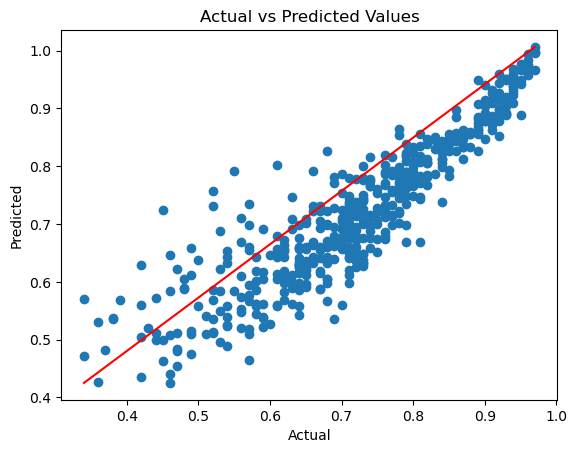

In [12]:
y_pred = predict(x, w, b)

plt.scatter(y, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], color='red')
plt.show()